<a href="https://colab.research.google.com/github/flattwhitte/back-up/blob/master/CNN_MNIST_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN을 이용하여 MNIST dataset 학습하기,
조태호 저, 모두의 딥러닝의 code를 살짝 변형했습니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

# 데이터를 불러옵니다.
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(X_train)


numpy.ndarray

In [ ]:
print(X_train.shape)

(60000, 28, 28)


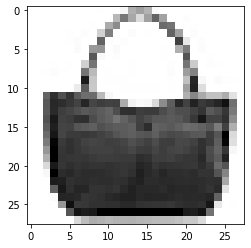

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[100], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.

import sys

for x in X_train[100]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  1  0  0  18 1071191039  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  99 15511361 1181731170  0  3  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  1  0  1101360  0  0  0  0  1671590  0  2  0  0  0  0  0  0  
0  0  0  0  0  1  0  6  0  72 1470  0  5  0  2  0  0  1741180  5  0  0  0  0  0  0  
0  0  0  0  0  1  5  0  0  1744  0  4  0  0  0  0  0  0  20444 0  4  0  0  0  0  0  
0  0  0  0  0  0  8  0  1251280  9  0  0  0  0  0  2  0  1071520  6  0  0  0  0  0  
0  0  0  0  0  0  0  0  1849  0  4  0  0  0  0  0  2  0  0  1900  0  2  0  0  0  0  
0  0  0  1  0  2  0  73 1580  0  0  0  1  0  0  0  0  4  0  15779 0  3  1  0  0  0  
0  0  2  5  1  0  0  15798 0  2  0  0  1  0  0  0  0  5  0  1211450  0  0  0  0  0  
0  0  0  0  0  0  0  23184 0  2  1  1  0  0  0  0  0  1  0  92 22316 0  7  4  1  0  
0  0  0  0  0  0  38 18381 0  0  0  2  2  1  2  1  0  1  0  12022657 0  0  0  0  0  
0  0  17321619321318316416798 16 0  0  0  0  0  0  0  0  0  10714

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train[257]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [16]:
import tensorflow as tf
print(tf.__version__)
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

2.9.2
Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 1.1567 - accuracy: 0.8446
Epoch 2/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2963 - accuracy: 0.8935
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2579 - accuracy: 0.9052
Epoch 4/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2362 - accuracy: 0.9125
Epoch 5/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2139 - accuracy: 0.9205
Epoch 6/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1965 - accuracy: 0.9277
Epoch 7/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1752 - accuracy: 0.9349
Epoch 8/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1624 - accuracy: 0.9398
Epoch 9/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1434 - accuracy: 0.9468
Epoch 10/20
1875/1875 [==============================] - 4

In [19]:

# 모델 최적화를 위한 설정 구간입니다.

#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath="./data/model/fahsion_mnist.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))




Epoch 1: val_loss improved from inf to 0.02905, saving model to ./data/model/fahsion_mnist.hdf5

Epoch 2: val_loss improved from 0.02905 to 0.02633, saving model to ./data/model/fahsion_mnist.hdf5

Epoch 3: val_loss did not improve from 0.02633

Epoch 4: val_loss did not improve from 0.02633

Epoch 5: val_loss did not improve from 0.02633

Epoch 6: val_loss did not improve from 0.02633

Epoch 7: val_loss did not improve from 0.02633

Epoch 8: val_loss did not improve from 0.02633

Epoch 9: val_loss did not improve from 0.02633

Epoch 10: val_loss did not improve from 0.02633

Epoch 11: val_loss did not improve from 0.02633

Epoch 12: val_loss did not improve from 0.02633
313/313 [==============================] - 3s 10ms/step - loss: 1.1053 - accuracy: 0.8970

 Test Accuracy: 0.8970


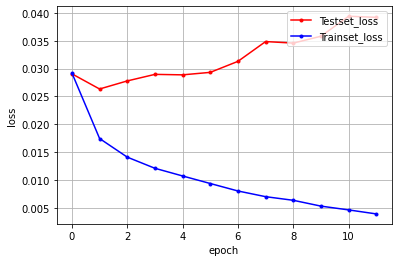

In [23]:
# 검증셋과 학습셋의 오차를 그래프로 표현
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()